# Metrics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import mglearn
import pandas as pd
from sklearn.datasets import load_iris,make_moons,make_blobs
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix,precision_score,recall_score,f1_score,
    roc_curve,roc_auc_score,precision_recall_curve,accuracy_score,classification_report)

### Part 1: Binary Classification

We use the synthetic 'moons' data:

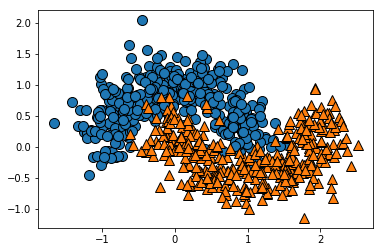

In [2]:
X, y = make_moons(n_samples=1000, noise=0.25, random_state=4)
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify=y)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

We look at the performance of SVM classifiers

In [3]:
kernel_svm = SVC(kernel='rbf', gamma=0.1).fit(X_train,y_train)
predictions = kernel_svm.predict(X_test)
print("Confusion matrix:  \n{}\n".format(confusion_matrix(y_test,predictions)))
print("Precision: \n{}\n".format(precision_score(y_test,predictions,pos_label=1)))
print("Recall: \n{}\n".format(recall_score(y_test,predictions,pos_label=1)))
print("F1: \n{}".format(f1_score(y_test,predictions,pos_label=1)))


Confusion matrix:  
[[104  21]
 [ 15 110]]

Precision: 
0.8396946564885496

Recall: 
0.88

F1: 
0.859375


Now looking at the ROC curve:

Area under curve: 
0.943744


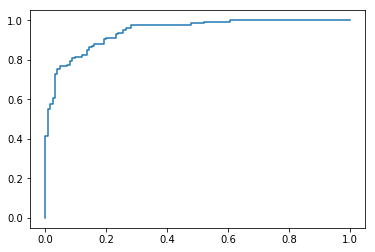

In [4]:
fprSVM,tprSVM,thresh = roc_curve(y_test,kernel_svm.decision_function(X_test))
plt.plot(fprSVM,tprSVM)
print("Area under curve: \n{}".format(roc_auc_score(y_test,kernel_svm.decision_function(X_test))) )

Precision-Recall curve:

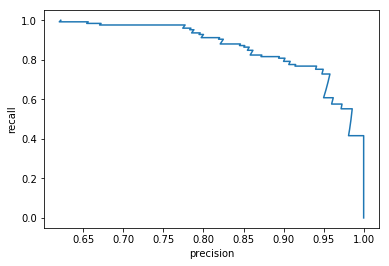

In [5]:
precSVM,recSVM,thresh = precision_recall_curve(y_test,kernel_svm.decision_function(X_test))
plt.xlabel('precision')
plt.ylabel('recall')
plt.plot(precSVM,recSVM)